# import libraries 


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
import pandas as pd

file_path = r'C:\Users\92349\Desktop\Prodigy internship\Titanic-Dataset.csv'

df = pd.read_csv(file_path)

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
pd.crosstab(df['Survived'], columns='count')

col_0,count
Survived,
0,549
1,342


Count: 549 not survived and 342 survived
Mean: The average survival rate is 0.38, indicating that approximately 38.38% of passengers survived.
Std: The standard deviation is 0.48, suggesting some variability in survival.
Min: The minimum survival value is 0, indicating no survival.
25%: 25% of survival values are 0 (no survival).
50% (Median): The median survival value is 0, indicating that 50% of passengers did not survive.


In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177 values in age, 687 values in cabin and 2 values in Embarked are missing.

### Handling Missing Values.


In [49]:

df['Age'].fillna(df['Age'].mean(), inplace=True)


### since alot of values in cabin column are missing we can drop this column. 

In [50]:
df.drop('Cabin', axis=1, inplace=True)

In [52]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [53]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### no values are missing now

# Visualize the distribution of the 'Survived' variable

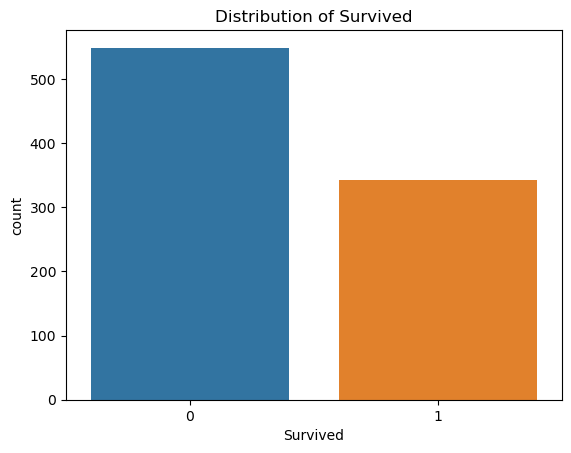

In [54]:
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

## Explore the distribution of 'Age' among different classes

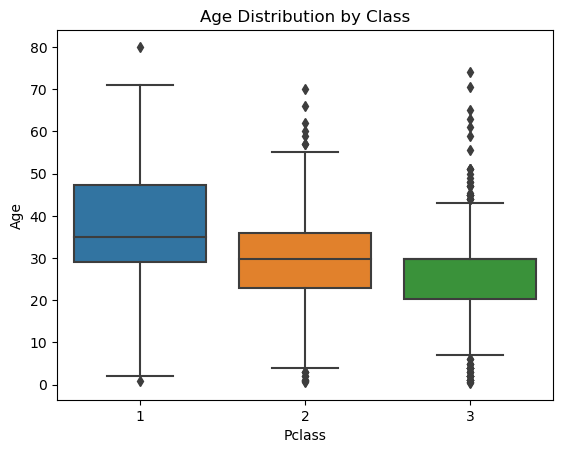

In [56]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.show()

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\92349\Desktop\Prodigy internship\Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

titanic_df_cleaned = df.groupby('Pclass').apply(lambda x: remove_outliers_iqr(x, 'Age')).reset_index(drop=True)




### Boxplot after removing outliers


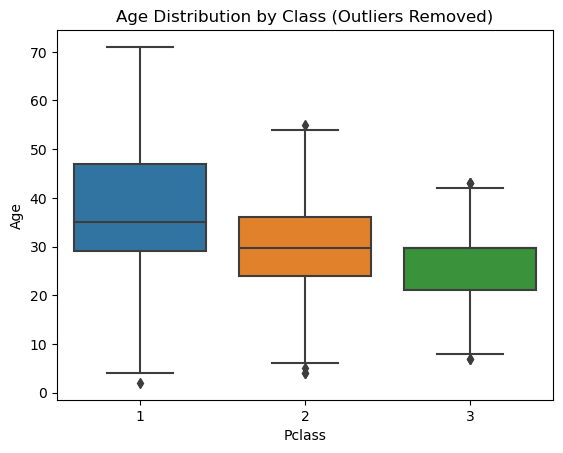

In [59]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df_cleaned)
plt.title('Age Distribution by Class (Outliers Removed)')
plt.show()

### Explore the survival rate based on gender


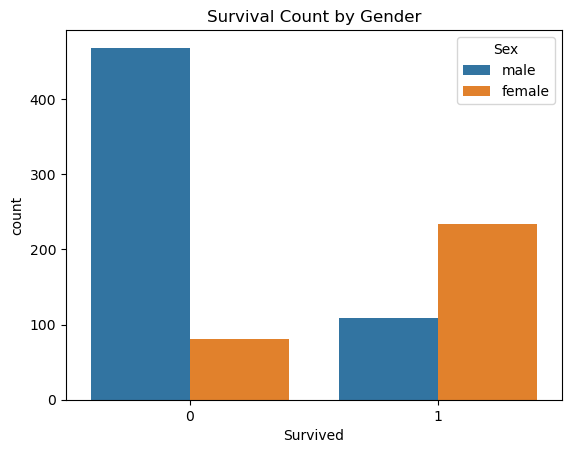

In [61]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()


### Correlation matrix to explore relationships between numerical variables

C:\Users\92349\AppData\Local\Temp\ipykernel_5828\1072920520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


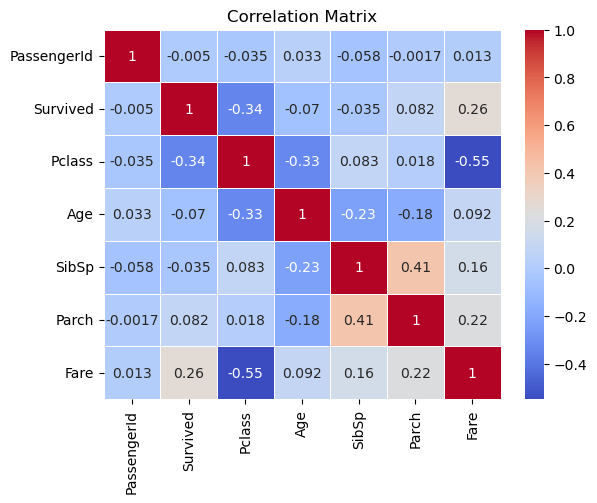

In [62]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()